<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Bone-Mineral-Density-Estimation-from-Conventional-X-rays-using-Deep-Learning/blob/main/Bone_Mineral_Density_Estimation_from_Conventional_X_rays_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub


path = kagglehub.dataset_download("orvile/knee-x-ray-osteoporosis-database")

print("Path to dataset files:", path)

100%|██████████| 182M/182M [00:07<00:00, 26.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1


In [3]:
import os


print(os.listdir(path))

['Osteoporosis Knee X-ray']


In [4]:
updated_path = os.path.join(path, 'Osteoporosis Knee X-ray')

In [5]:
sub_folders=os.listdir(updated_path)

In [6]:
print(sub_folders)

['osteopenia', 'patient details.xlsx', 'README.txt', 'osteoporosis', 'normal']


In [7]:
sub_folders.remove('README.txt')

In [8]:
print(sub_folders)

['osteopenia', 'patient details.xlsx', 'osteoporosis', 'normal']


In [9]:
osteopenia=os.path.join(updated_path, 'osteopenia')
osteoporosis=os.path.join(updated_path, 'osteoporosis')
normal=os.path.join(updated_path, 'normal')
patient_details=os.path.join(updated_path, 'patient details.xlsx')

In [10]:
print(osteopenia)
print(osteoporosis)
print(normal)
print(patient_details)

/root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1/Osteoporosis Knee X-ray/osteopenia
/root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1/Osteoporosis Knee X-ray/osteoporosis
/root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1/Osteoporosis Knee X-ray/normal
/root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1/Osteoporosis Knee X-ray/patient details.xlsx


In [11]:
osteopenia_data=os.listdir(osteopenia)
osteoporosis_data=os.listdir(osteoporosis)
normal_data=os.listdir(normal)

In [12]:
import pandas as pd

In [13]:
patient_details_data=pd.read_excel(patient_details)

In [14]:
patient_details_data.head()

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1.0,OP1,yes,male,65.0,NaN,1.64592,65.0,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2.0,OP2,yes,female,54.0,46,1.67640,78.0,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3.0,OP3,yes,female,49.0,43,1.37160,59.0,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4.0,OP4,yes,female,57.0,40,1.52400,72.0,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5.0,OP5,yes,female,40.0,NaN,1.49352,54.0,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia


In [15]:
patient_details_data.tail()

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
238,239.0,OP154,yes,female,56.000000,48,1.520000,68.000000,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia
239,240.0,N37,yes,male,39.000000,NaN,1.630000,70.000000,no,no,...,no,5.0,low salt,no,-0.76,-0.59,26.346494,knee,over weight,normal
240,NaN,NaN,NaN,NaN,107.000000,max,1.828800,98.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,17.000000,min,1.371600,39.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,51.045833,avg,1.585659,69.058333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
patient_details_data.shape

(243, 28)

In [17]:
features=patient_details_data.columns

In [18]:
print(features)

Index(['S.No', 'Patient Id', 'Joint Pain:', 'Gender', 'Age', 'Menopause Age',
       'height  (meter)', 'Weight (KG) ', 'Smoker', 'Alcoholic', 'Diabetic',
       'Hypothyroidism', 'Number of Pregnancies', 'Seizer Disorder',
       'Estrogen Use', 'Occupation ', 'History of Fracture', 'Dialysis:',
       'Family History of Osteoporosis', 'Maximum Walking distance (km)',
       'Daily Eating habits', 'Medical History', 'T-score Value',
       'Z-Score Value', 'BMI: ', 'Site', 'Obesity', 'Diagnosis'],
      dtype='object')


In [19]:
patient_details_data = patient_details_data.dropna(subset=['Patient Id'])

In [20]:
patient_details_data.shape

(240, 28)

In [21]:
patient_details_data.tail()

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
235,236.0,OP152,yes,female,56.0,NaN,1.54,80.0,no,no,...,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237.0,OS49,yes,male,55.0,NaN,1.53,63.0,no,no,...,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238.0,OP153,yes,male,49.0,NaN,1.67,88.0,no,no,...,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239.0,OP154,yes,female,56.0,48,1.52,68.0,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia
239,240.0,N37,yes,male,39.0,NaN,1.63,70.0,no,no,...,no,5.0,low salt,no,-0.76,-0.59,26.346494,knee,over weight,normal


In [22]:
non_numeric_t_score = patient_details_data[pd.to_numeric(patient_details_data['T-score Value'], errors='coerce').isna()]
if not non_numeric_t_score.empty:
    print("Rows with non-numerical values in 'T-score Value':")
    display(non_numeric_t_score)
else:
    print("No non-numerical values found in 'T-score Value'.")

No non-numerical values found in 'T-score Value'.


In [23]:
print(os.listdir(osteopenia))

['OP147.jpg', 'OP83.jpg', 'OP142.jpg', 'OP21.JPEG', 'OP60.jpg', 'OP33.JPEG', 'OP9.JPEG', 'OP134.jpg', 'OP44.JPEG', 'OP50.jpg', 'OP45.jpg', 'OP66.jpg', 'OP104.jpg', 'OP87.jpg', 'OP12.JPEG', 'OP54.jpg', 'OP146.jpg', 'OP63.jpg', 'OP24.JPEG', 'OP51.jpg', 'OP90.jpg', 'OP67.jpg', 'OP64.jpg', 'OP136.jpg', 'OP78.jpg', 'OP14.JPEG', 'OP108.jpg', 'OP68.jpg', 'OP4.JPEG', 'OP150.jpg', 'OP23.JPEG', 'OP141.jpg', 'OP35.JPEG', 'OP84.jpg', 'OP109.jpg', 'OP101.jpg', 'OP118.jpg', 'OP74.jpg', 'OP26.JPEG', 'OP124.jpg', 'OP77.jpg', 'OP58.jpg', 'OP57.jpg', 'OP137.jpg', 'OP81.jpg', 'OP42.JPEG', 'OP106.jpg', 'OP79.jpg', 'OP144.jpg', 'OP154.jpg', 'OP93.jpg', 'OP113.jpg', 'OP38.JPEG', 'OP82.jpg', 'OP139.jpg', 'OP3.JPEG', 'OP105.jpg', 'OP13.JPEG', 'OP91.jpg', 'OP5.JPEG', 'OP59.jpg', 'OP80.jpg', 'OP27.JPEG', 'OP132.jpg', 'OP2.JPEG', 'OP37.JPEG', 'OP39.JPEG', 'OP153.jpg', 'OP86.jpg', 'OP75.jpg', 'OP127.jpg', 'OP126.jpg', 'OP123.jpg', 'OP47.jpg', 'OP48.jpg', 'OP112.jpg', 'OP85.jpg', 'OP15.JPEG', 'OP18.JPEG', 'OP22.JP

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

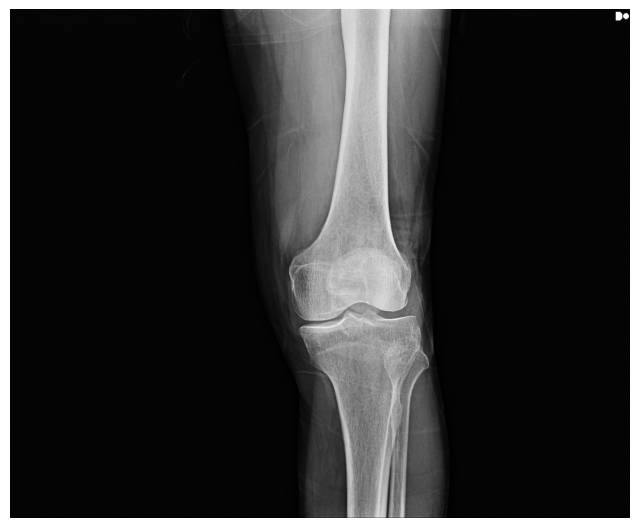

In [25]:

first_image_filename = osteopenia_data[0]
first_image_path = os.path.join(osteopenia, first_image_filename)


img = Image.open(first_image_path)


gray_img = img.convert('L')


plt.figure(figsize=(8, 8))
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
grayscale_dir = os.path.join(updated_path, 'grayscale_images')
os.makedirs(grayscale_dir, exist_ok=True)

osteopenia_gray_dir = os.path.join(grayscale_dir, 'osteopenia')
osteoporosis_gray_dir = os.path.join(grayscale_dir, 'osteoporosis')
normal_gray_dir = os.path.join(grayscale_dir, 'normal')

os.makedirs(osteopenia_gray_dir, exist_ok=True)
os.makedirs(osteoporosis_gray_dir, exist_ok=True)
os.makedirs(normal_gray_dir, exist_ok=True)

In [27]:
directory_pairs = [
    (osteopenia, osteopenia_gray_dir),
    (osteoporosis, osteoporosis_gray_dir),
    (normal, normal_gray_dir)
]

for original_dir, gray_dir in directory_pairs:
    image_files = os.listdir(original_dir)
    for image_file in image_files:
        original_image_path = os.path.join(original_dir, image_file)
        gray_image_path = os.path.join(gray_dir, image_file)

        try:
            img = Image.open(original_image_path)
            gray_img = img.convert('L')
            gray_img.save(gray_image_path)
        except Exception as e:
            print(f"Could not process image {original_image_path}: {e}")


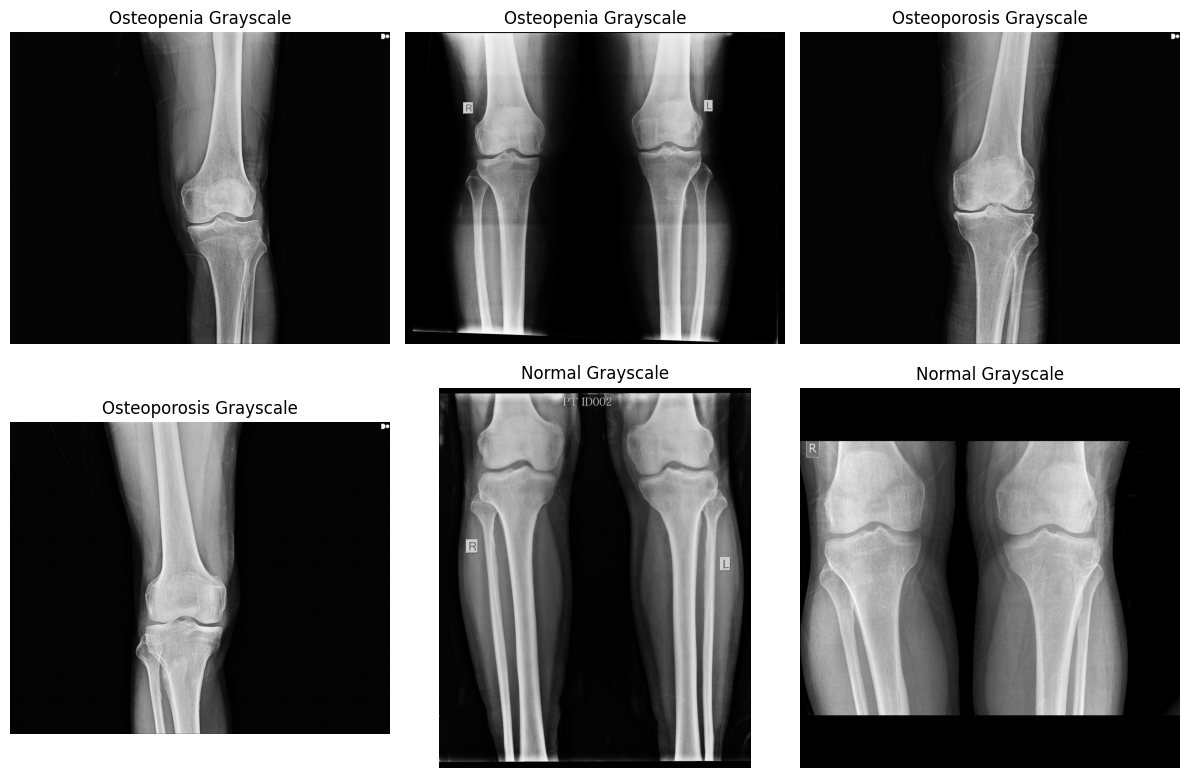

In [28]:
osteopenia_sample = osteopenia_data[:2]
osteoporosis_sample = osteoporosis_data[:2]
normal_sample = normal_data[:2]

all_samples = []
for filename in osteopenia_sample:
    all_samples.append((os.path.join(osteopenia_gray_dir, filename), 'Osteopenia Grayscale'))
for filename in osteoporosis_sample:
    all_samples.append((os.path.join(osteoporosis_gray_dir, filename), 'Osteoporosis Grayscale'))
for filename in normal_sample:
    all_samples.append((os.path.join(normal_gray_dir, filename), 'Normal Grayscale'))

plt.figure(figsize=(12, 8))
for i, (image_path, title) in enumerate(all_samples):
    try:
        img = Image.open(image_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    except Exception as e:
        print(f"Could not display image {image_path}: {e}")

plt.tight_layout()
plt.show()

In [30]:
print(os.listdir(osteopenia_gray_dir))

['OP147.jpg', 'OP83.jpg', 'OP142.jpg', 'OP21.JPEG', 'OP60.jpg', 'OP33.JPEG', 'OP9.JPEG', 'OP134.jpg', 'OP44.JPEG', 'OP50.jpg', 'OP45.jpg', 'OP66.jpg', 'OP104.jpg', 'OP87.jpg', 'OP12.JPEG', 'OP54.jpg', 'OP146.jpg', 'OP63.jpg', 'OP24.JPEG', 'OP51.jpg', 'OP90.jpg', 'OP67.jpg', 'OP64.jpg', 'OP136.jpg', 'OP78.jpg', 'OP14.JPEG', 'OP108.jpg', 'OP68.jpg', 'OP4.JPEG', 'OP150.jpg', 'OP23.JPEG', 'OP141.jpg', 'OP35.JPEG', 'OP84.jpg', 'OP109.jpg', 'OP101.jpg', 'OP118.jpg', 'OP74.jpg', 'OP26.JPEG', 'OP124.jpg', 'OP77.jpg', 'OP58.jpg', 'OP57.jpg', 'OP137.jpg', 'OP81.jpg', 'OP42.JPEG', 'OP106.jpg', 'OP79.jpg', 'OP144.jpg', 'OP154.jpg', 'OP93.jpg', 'OP113.jpg', 'OP38.JPEG', 'OP82.jpg', 'OP139.jpg', 'OP3.JPEG', 'OP105.jpg', 'OP13.JPEG', 'OP91.jpg', 'OP5.JPEG', 'OP59.jpg', 'OP80.jpg', 'OP27.JPEG', 'OP132.jpg', 'OP2.JPEG', 'OP37.JPEG', 'OP39.JPEG', 'OP153.jpg', 'OP86.jpg', 'OP75.jpg', 'OP127.jpg', 'OP126.jpg', 'OP123.jpg', 'OP47.jpg', 'OP48.jpg', 'OP112.jpg', 'OP85.jpg', 'OP15.JPEG', 'OP18.JPEG', 'OP22.JP

In [31]:
print(os.listdir(osteoporosis_gray_dir))

['OS40.jpg', 'OS39.jpg', 'OS16.jpg', 'OS10.jpg', 'OS1.JPEG', 'OS37.jpg', 'OS17.jpg', 'OS28.jpg', 'OS8.jpg', 'OS29.jpg', 'OS11.jpg', 'OS19.jpg', 'OS43.jpg', 'OS46.jpg', 'OS2.JPEG', 'OS14.jpg', 'OS38.jpg', 'OS31.jpg', 'OS49.jpg', 'OS13.jpg', 'OS36.jpg', 'OS44.jpg', 'OS20.jpg', 'OS6.JPEG', 'OS35.jpg', 'OS30.jpg', 'OS47.jpg', 'OS18.jpg', 'OS12.jpg', 'OS7.JPEG', 'OS15.jpg', 'OS42.jpg', 'OS32.jpg', 'OS9.jpg', 'OS21.jpg', 'OS41.jpg', 'OS5.JPEG', 'OS26.jpg', 'OS22.jpg', 'OS33.jpg', 'OS27.jpg', 'OS23.jpg', 'OS3.JPEG', 'OS48.jpg', 'OS25.jpg', 'OS45.jpg', 'OS34.jpg', 'OS24.jpg', 'OS4.JPEG']


In [32]:
print(os.listdir(normal_gray_dir))

['N21.jpg', 'N1.JPEG', 'N36.jpg', 'N4.JPEG', 'N16.jpg', 'N24.jpg', 'N20.jpg', 'N35.jpg', 'N8.JPEG', 'N30.jpg', 'N3.JPEG', 'N6.JPEG', 'N10.JPEG', 'N25.jpg', 'N34.jpg', 'N23.jpg', 'N28.jpg', 'N13.jpg', 'N22.jpg', 'N2.JPEG', 'N15.jpg', 'N7.JPEG', 'N19.jpg', 'N29.jpg', 'N33.jpg', 'N17.jpg', 'N18.jpg', 'N32.jpg', 'N14.jpg', 'N26.jpg', 'N11.JPEG', 'N12.JPEG', 'N5.JPEG', 'N31.jpg', 'N27.jpg', 'N9.JPEG']


In [39]:
image_data = []
gray_dirs = [osteopenia_gray_dir, osteoporosis_gray_dir, normal_gray_dir]

In [40]:
for gray_dir in gray_dirs:
    for filename in os.listdir(gray_dir):
        file_path = os.path.join(gray_dir, filename)
        if os.path.isfile(file_path):
            patient_id, _ = os.path.splitext(filename)
            image_data.append((file_path, patient_id))

In [41]:
image_df = pd.DataFrame(image_data, columns=['Grayscale Image Path', 'Patient Id'])
display(image_df.head())

,Grayscale Image Path,Patient Id
0,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP147
1,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP83
2,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP142
3,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP21
4,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP60


In [42]:
merged_df = pd.merge(image_df, patient_details_data, on='Patient Id', how='inner')
display(merged_df.head())

,Grayscale Image Path,Patient Id,S.No,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP147,229.0,yes,male,70.0,NaN,1.53000,56.0,no,...,no,0.2,low protiens,stomach,-1.56,-1.89,23.922423,knee,normal weight,osteopenia
1,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP83,114.0,yes,female,50.0,48,1.49352,72.0,no,...,no,1.0,normal,no,-2.23,-0.76,32.278282,knee,obesity,osteopenia
2,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP142,221.0,yes,female,50.0,NaN,1.51000,62.0,no,...,no,1.0,low protiens,R.arthrities,-2.39,-1.60,27.191790,knee,over weight,osteopenia
3,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP21,25.0,yes,male,63.0,NaN,1.61544,76.0,yes,...,no,4.0,normal,G.B rem,-1.76,-0.81,29.122720,knee,over weight,osteopenia
4,/root/.cache/kagglehub/datasets/orvile/knee-x-...,OP60,85.0,yes,female,45.0,35,1.55448,80.0,no,...,no,0.3,normal,"B.P, G.B removed",-2.10,-1.67,33.106991,knee,obesity,osteopenia


In [43]:
final_df = merged_df[['Patient Id', 'Grayscale Image Path', 'T-score Value','Diagnosis']]
display(final_df.head())

,Patient Id,Grayscale Image Path,T-score Value,Diagnosis
0,OP147,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-1.56,osteopenia
1,OP83,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-2.23,osteopenia
2,OP142,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-2.39,osteopenia
3,OP21,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-1.76,osteopenia
4,OP60,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-2.10,osteopenia


In [44]:
missing_t_score_count = final_df['T-score Value'].isnull().sum()
print(f"Number of missing values in 'T-score Value': {missing_t_score_count}")

if missing_t_score_count > 0:
    final_df = final_df.dropna(subset=['T-score Value'])
    print("Rows with missing 'T-score Value' removed.")

print("Shape of final_df after handling missing values:", final_df.shape)

Number of missing values in 'T-score Value': 0
Shape of final_df after handling missing values: (239, 4)


In [45]:
display(final_df.tail())

,Patient Id,Grayscale Image Path,T-score Value,Diagnosis
234,N12,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-0.31,normal
235,N5,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-0.43,normal
236,N31,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-0.52,normal
237,N27,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-0.87,normal
238,N9,/root/.cache/kagglehub/datasets/orvile/knee-x-...,-0.97,normal


In [48]:
final_df.describe()

,T-score Value
count,239.000000
mean,-1.838117
std,0.685146
min,-2.990000
25%,-2.325000
50%,-2.010000
75%,-1.305000
max,-0.160000


In [52]:
test_img_0=final_df['Grayscale Image Path'][0]

In [54]:
test_img_0

'/root/.cache/kagglehub/datasets/orvile/knee-x-ray-osteoporosis-database/versions/1/Osteoporosis Knee X-ray/grayscale_images/osteopenia/OP147.jpg'

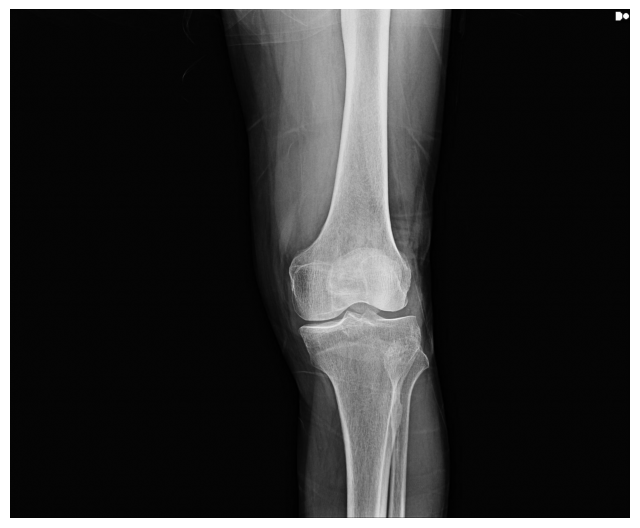

In [58]:
img = Image.open(test_img_0)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [59]:
import cv2

In [62]:
import cv2
import numpy as np


processed_images = []
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
kernel = np.ones((3,3), np.uint8)

for path in final_df['Grayscale Image Path']:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(img, (224, 224))
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)
    enhanced = clahe.apply(blurred)
    thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    normalized = opened / 255.0





    processed_images.append(normalized)


final_df.loc[:, 'Resized Image'] = processed_images


In [64]:
final_df['Resized Image'][0]

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
#imp=plt.imshow(final_df['Resized Image'][0], cmap='gray')
#plt.axis('off')
#plt.show()

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
